# Задача 18-30

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as smp

##### Символьные переменные

![Alt text](task.svg)

In [53]:
m1, m2, c1, c2, c3, beta, t, g = smp.symbols(r"m_{1} m_{2} c_{1} c_{2} c_{3} \beta t g", positive = True)
amp, w = smp.symbols(r"A \omega")
x1, x2 = smp.symbols(r"x_{1} x_{2}", cls = smp.Function)
u11, u12, u21, u22 = smp.symbols(r"u_{11} u_{12} u_{21} u_{22}")
lamb = smp.symbols(r"\lambda")

x1 = x1(t)
x2 = x2(t)

x1_d = smp.diff(x1, t)
x2_d = smp.diff(x2, t)


x1_dd = smp.diff(x1_d, t)
x2_dd = smp.diff(x2_d, t)

q = smp.Matrix([x1, x2])
q_d = smp.Matrix([x1_d, x2_d])
q_dd = smp.Matrix([x1_dd, x2_dd])

u1 = smp.Matrix([u11, u21])
u2 = smp.Matrix([u12, u22])

a = smp.Matrix([amp, 0])

Кинетическая и потенциальная энергия

In [54]:
T = m1 * (x1_d**2) / 2 + m2 * (x2_d**2) / 2
P = m1 * g * x1 + m2 * g * x2 + c1 * (x1**2) / 2 + c3 * (x2 ** 2) / 2 + c2 * ((x2 - x1)**2) / 2

In [55]:
A = smp.Matrix([[smp.diff(smp.diff(T, q_d[j]), q_d[i]) for i in range(len(q))] for j in range(len(q))])
A

Matrix([
[m_{1},     0],
[    0, m_{2}]])

In [56]:
C = smp.Matrix([[smp.diff(smp.diff(P, q[j]), q[i]) for i in range(len(q))] for j in range(len(q))])
C

Matrix([
[c_{1} + c_{2},        -c_{2}],
[       -c_{2}, c_{2} + c_{3}]])

In [57]:
B = smp.Matrix([[0, 0], [0, beta]])
B

Matrix([
[0,     0],
[0, \beta]])

**Уравнения движения системы**

In [58]:
# charFunction = A * (lamb ** 2) + B * lamb + C
charFunction = C - lamb * A
eigenFreq = smp.solve(charFunction.det(), lamb)
eigenFreq[0]

(c_{1}*m_{2} + c_{2}*m_{1} + c_{2}*m_{2} + c_{3}*m_{1} - sqrt(c_{1}**2*m_{2}**2 - 2*c_{1}*c_{2}*m_{1}*m_{2} + 2*c_{1}*c_{2}*m_{2}**2 - 2*c_{1}*c_{3}*m_{1}*m_{2} + c_{2}**2*m_{1}**2 + 2*c_{2}**2*m_{1}*m_{2} + c_{2}**2*m_{2}**2 + 2*c_{2}*c_{3}*m_{1}**2 - 2*c_{2}*c_{3}*m_{1}*m_{2} + c_{3}**2*m_{1}**2))/(2*m_{1}*m_{2})

**Матрица $D$** и зависимость положения грузов от времени(вблизи положения равновесия)

In [59]:
D = A * ((1j * w) ** 2) + B * (1j * w) + C
D

Matrix([
[-1.0*\omega**2*m_{1} + c_{1} + c_{2},                                                   -c_{2}],
[                              -c_{2}, 1.0*I*\beta*\omega - 1.0*\omega**2*m_{2} + c_{2} + c_{3}]])

In [60]:
W = D.inv()
W

Matrix([
[(1.0*I*\beta*\omega - 1.0*\omega**2*m_{2} + 1.0*c_{2} + 1.0*c_{3})/(-1.0*I*\beta*\omega**3*m_{1} + 1.0*I*\beta*\omega*c_{1} + 1.0*I*\beta*\omega*c_{2} + 1.0*\omega**4*m_{1}*m_{2} - 1.0*\omega**2*c_{1}*m_{2} - 1.0*\omega**2*c_{2}*m_{1} - 1.0*\omega**2*c_{2}*m_{2} - 1.0*\omega**2*c_{3}*m_{1} + 1.0*c_{1}*c_{2} + 1.0*c_{1}*c_{3} + 1.0*c_{2}*c_{3}),                                      1.0*c_{2}/(-1.0*I*\beta*\omega**3*m_{1} + 1.0*I*\beta*\omega*c_{1} + 1.0*I*\beta*\omega*c_{2} + 1.0*\omega**4*m_{1}*m_{2} - 1.0*\omega**2*c_{1}*m_{2} - 1.0*\omega**2*c_{2}*m_{1} - 1.0*\omega**2*c_{2}*m_{2} - 1.0*\omega**2*c_{3}*m_{1} + 1.0*c_{1}*c_{2} + 1.0*c_{1}*c_{3} + 1.0*c_{2}*c_{3})],
[                                                         1.0*c_{2}/(-1.0*I*\beta*\omega**3*m_{1} + 1.0*I*\beta*\omega*c_{1} + 1.0*I*\beta*\omega*c_{2} + 1.0*\omega**4*m_{1}*m_{2} - 1.0*\omega**2*c_{1}*m_{2} - 1.0*\omega**2*c_{2}*m_{1} - 1.0*\omega**2*c_{2}*m_{2} - 1.0*\omega**2*c_{3}*m_{1} + 1.0*c_{1}*c_{2} + 1.0

In [61]:
qSolution = W * a * smp.exp(1j * w * t)
qSolution_d = smp.diff(qSolution, t)

Вводим численные функции

In [62]:
params = [c1, c2, c3, m1, m2, beta, g, amp, w]
paramsLambda = [c1, c2, c3, m1, m2, beta, g, amp]
w_f = smp.lambdify(params, W)
qSolution_f = smp.lambdify(params + [t], qSolution)
qSolutiond_f = smp.lambdify(params + [t], qSolution_d)
eigenFreq_f = smp.lambdify(paramsLambda, eigenFreq)


In [63]:
c1 = c2 = c3 = 1
m1 = m2 = 2
g = 9.8
w = 1
beta = 10
a = 20
params = [c1, c2, c3, m1, m2, beta, g, a, w]

In [64]:
x1 = lambda t: a * abs(qSolution_f(*params, t)[0][0]) * np.cos(w * t + np.angle(qSolutiond_f(*params, t)[0][0])) 
x2 = lambda t: a * abs(qSolution_f(*params, t)[1][0]) * np.sin(w * t + np.angle(qSolution_f(*params, t)[1][0]))

x1_d = lambda t:  a * abs(qSolution_f(*params, t)[0][0]) * np.cos(w * t + np.angle(qSolutiond_f(*params, t)[0][0]))  + \
               a * abs(qSolutiond_f(*params, t)[0][0])  * np.sin(w * t + np.angle(qSolution_f(*params, t)[0][0]))
x2_d = lambda t: a * abs(qSolution_f(*params, t)[1][0]) * w* np.cos(w * t + np.angle(qSolutiond_f(*params, t)[1][0]))  + \
               a * abs(qSolutiond_f(*params, t)[1][0]) * np.sin(w * t + np.angle(qSolution_f(*params, t)[1][0]))

### АЧХ и ФЧХ системы

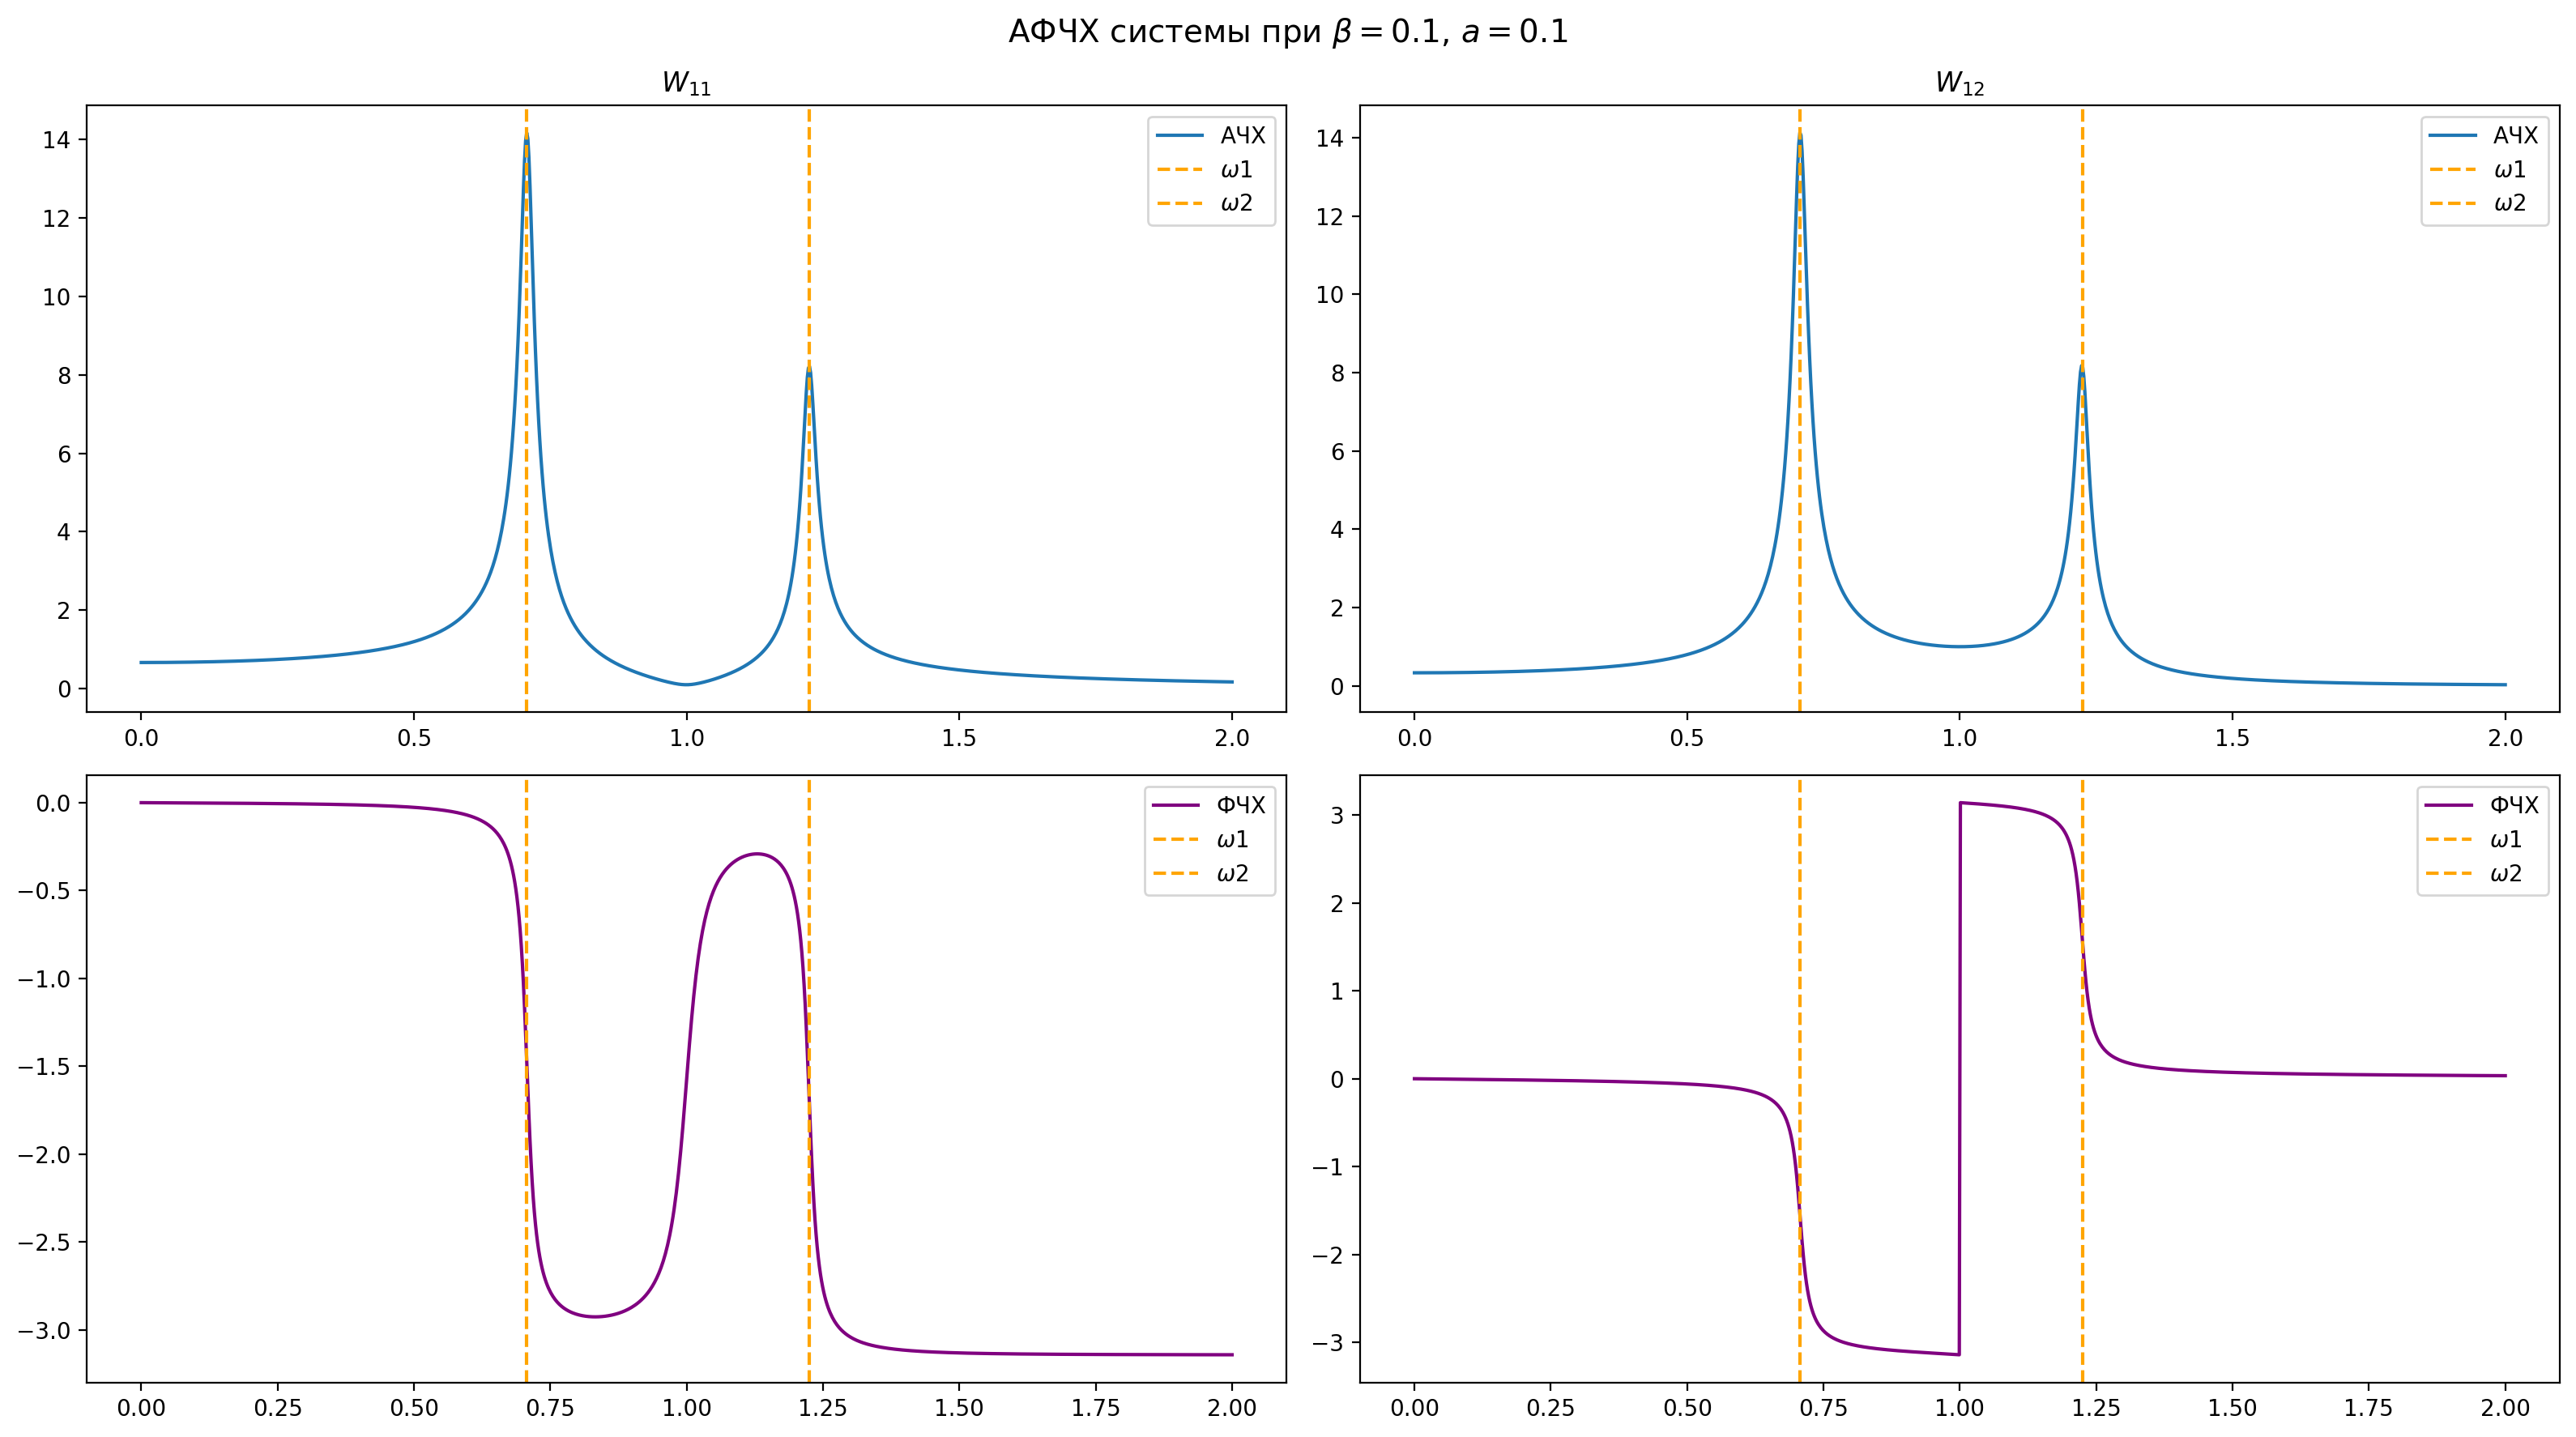

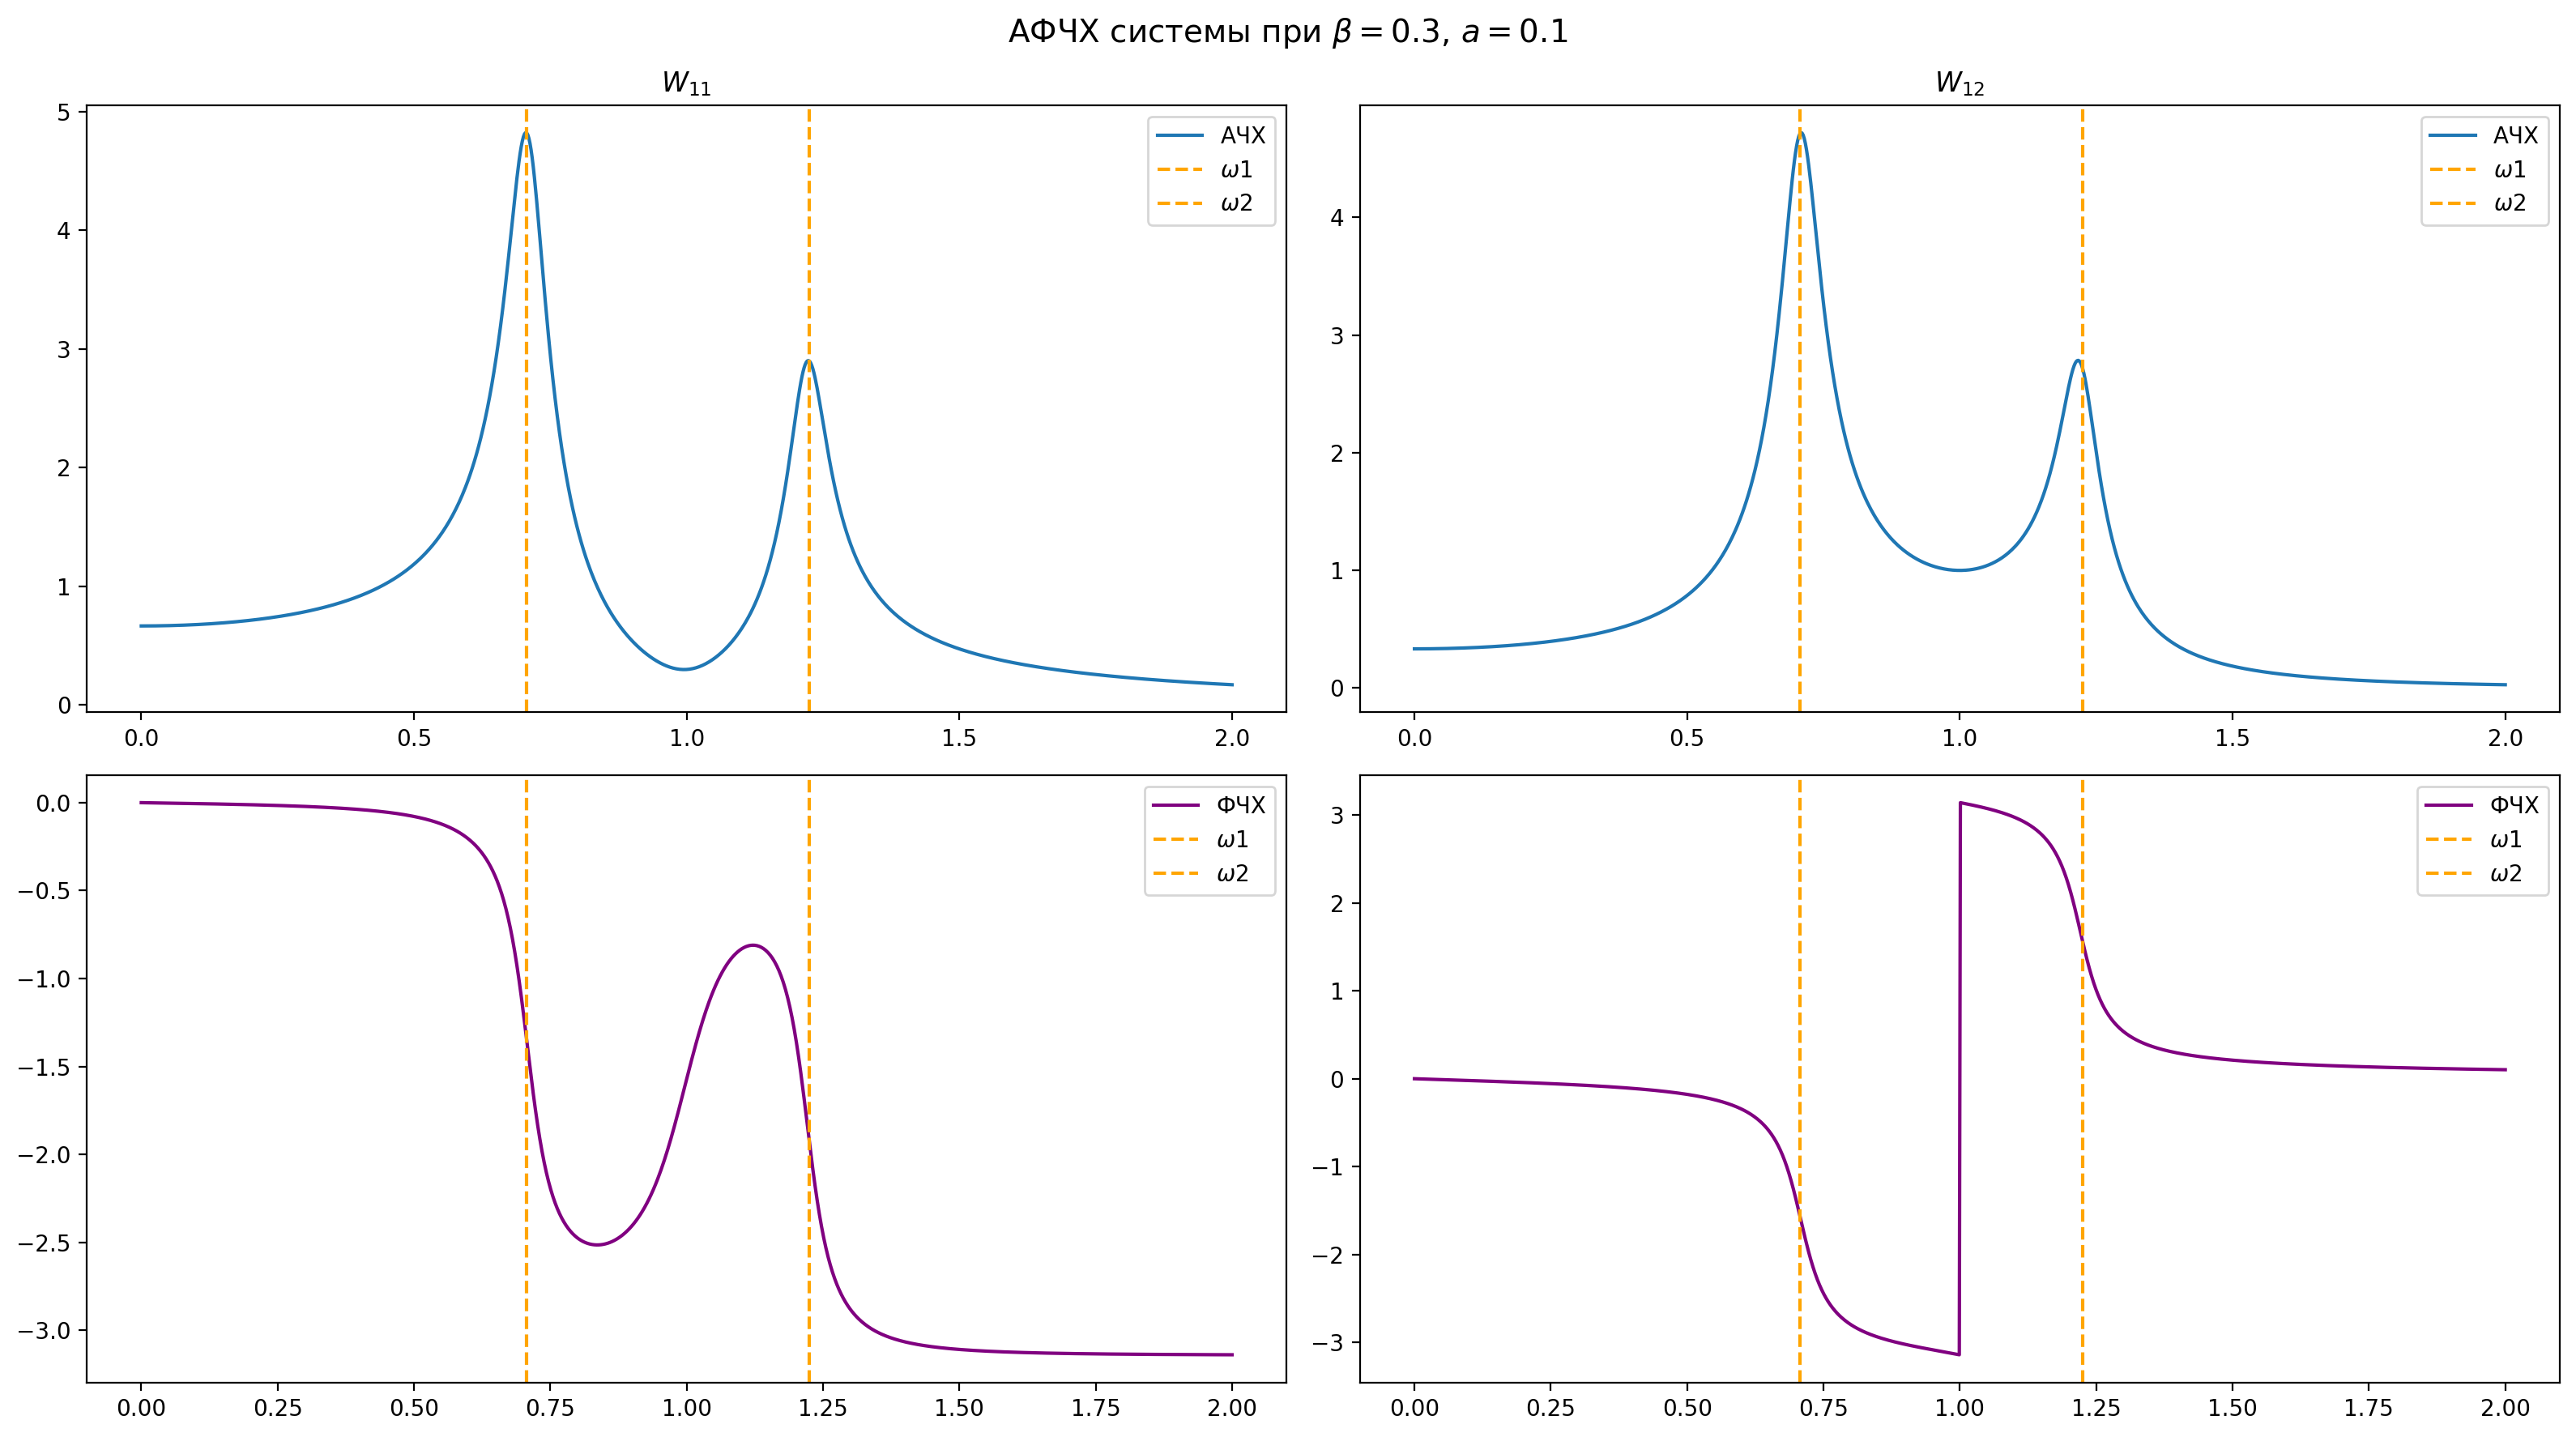

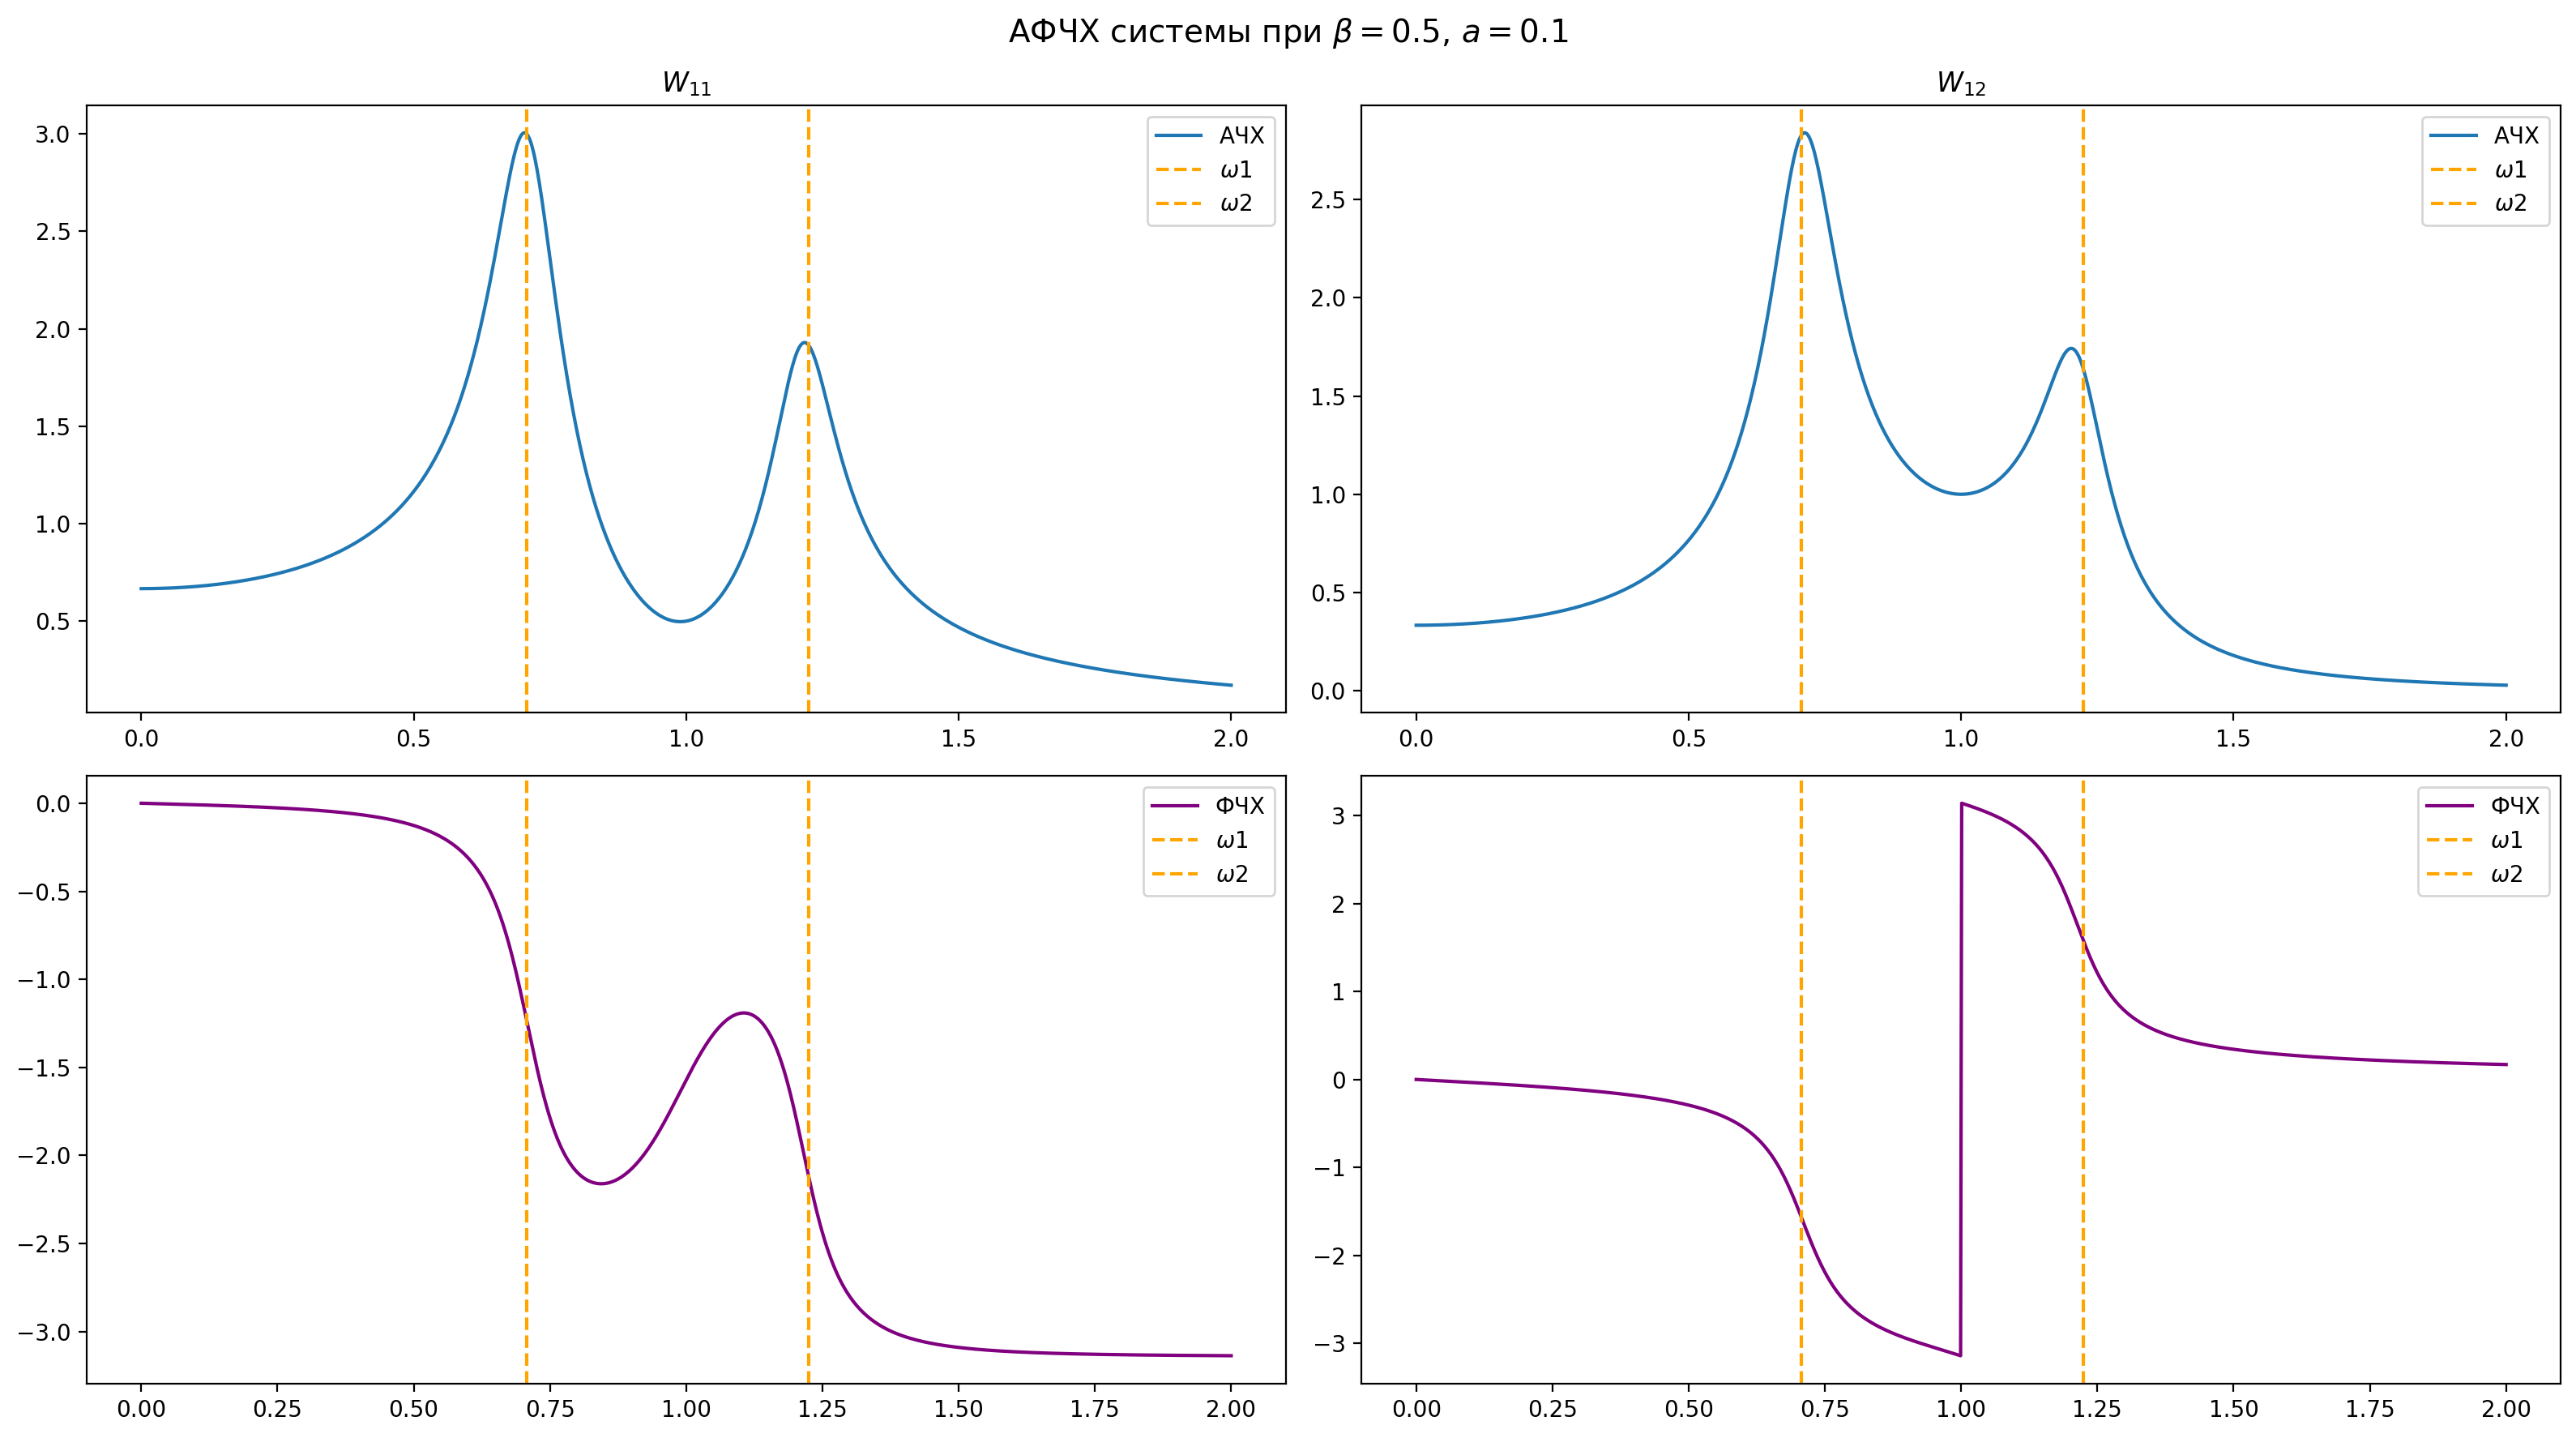

In [65]:
w_values = np.linspace(0, 2, 1000)

for beta in [0.1, 0.3, 0.5]:
    for alpha in [0.1]:
        fig, ax = plt.subplots(2, 2, figsize = (16, 9), dpi = 200)
        for i in range(2):
            ax[0, i].plot(w_values,
                    np.abs(w_f(c1, c2, c3, m1, m2, beta, g, alpha, w_values)[0, i]),
                    label = 'АЧХ')
            ax[1, i].plot(w_values,
                    np.angle(w_f(c1, c2, c3, m1, m2, beta, g, alpha, w_values)[0, i]),
                    label = 'ФЧХ',
                    color = 'purple')
            ax[0, i].set_title("$W_{1" + str(i + 1) + "}$")
            ax[0, i].set_xticks(np.arange(0, max(w_values) + 0.5, 0.5))
            for num, eiFreq in enumerate(eigenFreq_f(c1, c2, c3, m1, m2, beta, g, a)):
                ax[0, i].axvline(np.sqrt(abs(eiFreq)),
                            linestyle = '--',
                            color = 'orange',
                            label = '$\omega{}$'.format(num + 1))
                ax[1, i].axvline(np.sqrt(abs(eiFreq)),
                            linestyle = '--',
                            color = 'orange',
                            label = '$\omega{}$'.format(num + 1))
            ax[0, i].legend()
            ax[1, i].legend()
    
        fig.suptitle(r"АФЧХ системы при $\beta = {:.1f}$, $a = {}$".format(beta, alpha), fontsize = 14)
        fig.tight_layout()

### Анимация

In [66]:
from matplotlib.animation import FuncAnimation
import matplotlib.patches as mpatches
import matplotlib.lines
import math

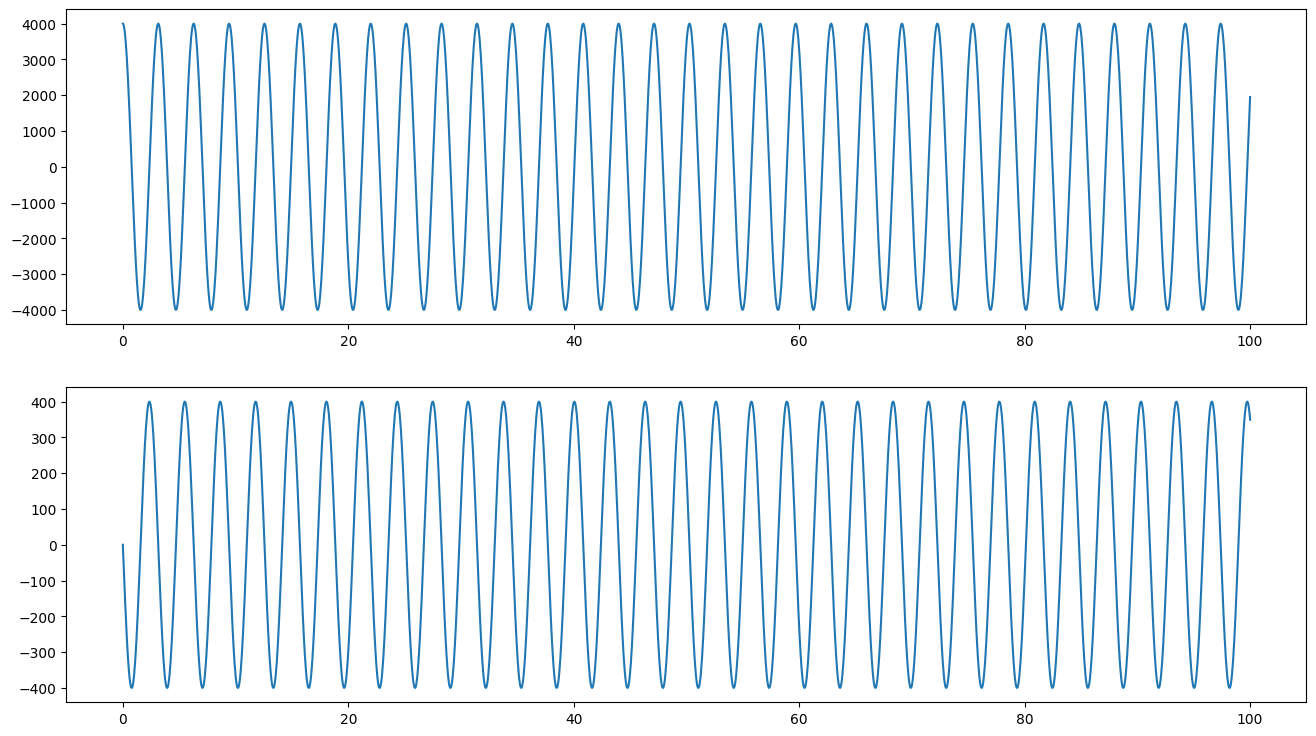

In [67]:
time = np.linspace(0, 100, 2000)

x1Arr = x1(time)
x2Arr = x2(time)

fig, ax = plt.subplots(2, 1, figsize = (16,9), dpi = 100)

ax[0].plot(time,
           x1Arr)

ax[1].plot(time,
           x2Arr)

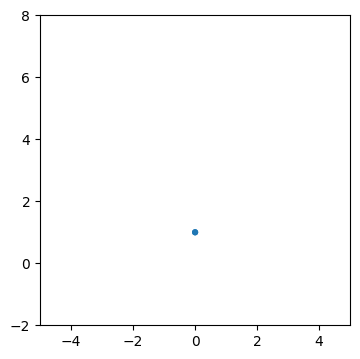

In [68]:
r = 0.1
c1 = plt.Circle((0,x1Arr[0]), r, animated = True)
c2 = plt.Circle((0, 1 + x2Arr[0]), r, animated = True)

fig, ax = plt.subplots(figsize = (4, 7), dpi = 100)

ax.set_xlim(-5, 5)
ax.set_ylim(-2, 8)
ax.set_aspect('equal')

def init():
    ax.add_patch(c1)
    ax.add_patch(c2)
    return [c1, c2]

def animate(i: int):
    c1.set_center((0, x1Arr[i]))
    c2.set_center((0, 2 + x2Arr[i]))
    return [c1, c2]



anim = FuncAnimation(fig, animate, init_func=init,
                     frames=100, interval= 60, blit=True)

plt.show()
anim.save('animation_6.gif', fps = 60)